In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

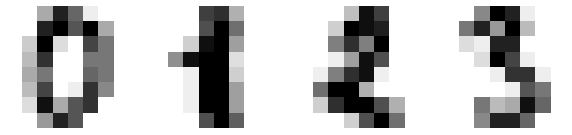

In [11]:
from sklearn.datasets import load_digits
df = load_digits()

_, axes = plt.subplots(nrows=1, ncols = 4, figsize = (10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title = ("Training: %i" % label)

In [12]:
df.images.shape

(1797, 8, 8)

In [13]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
df.images[0].shape

(8, 8)

In [15]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data = data/16
print(data.min())
print(data.max())
print(data[0])

0.0
1.0
[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]


In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split (data,df.target, train_size = 0.7, random_state = 19529)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [22]:
ypred = rf.predict(Xtest)
ypred

array([6, 9, 4, 1, 3, 6, 6, 7, 3, 5, 2, 6, 9, 0, 0, 1, 1, 5, 2, 7, 9, 7,
       9, 0, 3, 0, 3, 4, 8, 8, 4, 1, 5, 6, 5, 8, 0, 8, 9, 5, 5, 3, 9, 7,
       0, 0, 2, 1, 9, 6, 9, 5, 6, 3, 7, 3, 8, 8, 4, 8, 0, 5, 5, 7, 8, 2,
       1, 8, 6, 5, 7, 4, 5, 9, 8, 3, 9, 0, 2, 0, 1, 5, 2, 4, 6, 4, 0, 9,
       2, 2, 1, 7, 4, 9, 6, 1, 1, 2, 4, 9, 8, 6, 0, 0, 3, 8, 5, 5, 7, 1,
       2, 2, 7, 1, 2, 5, 7, 6, 7, 5, 8, 7, 5, 2, 6, 0, 0, 6, 9, 4, 4, 0,
       4, 2, 1, 7, 7, 0, 5, 2, 7, 4, 1, 5, 8, 9, 3, 7, 1, 5, 5, 9, 5, 4,
       6, 3, 8, 1, 7, 4, 4, 5, 5, 7, 9, 7, 4, 2, 4, 9, 4, 6, 3, 0, 9, 2,
       2, 9, 4, 7, 6, 7, 1, 0, 3, 3, 7, 3, 1, 3, 1, 1, 8, 3, 1, 5, 7, 7,
       6, 5, 3, 0, 4, 4, 0, 1, 6, 5, 9, 1, 3, 6, 4, 6, 2, 6, 9, 7, 0, 0,
       7, 5, 7, 5, 6, 6, 1, 1, 1, 3, 3, 0, 2, 9, 1, 7, 1, 4, 8, 4, 9, 5,
       0, 9, 8, 1, 3, 0, 1, 1, 5, 4, 5, 5, 4, 5, 5, 8, 8, 1, 2, 4, 7, 0,
       2, 0, 5, 0, 1, 7, 7, 3, 2, 5, 3, 5, 1, 7, 7, 4, 1, 9, 1, 2, 3, 1,
       4, 4, 3, 8, 1, 2, 1, 1, 7, 7, 0, 6, 6, 1, 2,

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, ypred)

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 67,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 62,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 56,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 48]])

In [25]:
classification_report(ytest, ypred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99        51\n           1       0.96      1.00      0.98        67\n           2       1.00      0.98      0.99        53\n           3       0.96      0.98      0.97        46\n           4       1.00      0.98      0.99        51\n           5       0.98      1.00      0.99        62\n           6       1.00      0.95      0.97        59\n           7       0.98      1.00      0.99        56\n           8       0.95      0.91      0.93        46\n           9       0.98      0.98      0.98        49\n\n    accuracy                           0.98       540\n   macro avg       0.98      0.98      0.98       540\nweighted avg       0.98      0.98      0.98       540\n'